# Notebook 2. Variables aleatorias

Elaboró: **Arellanos Balcázar Carlos Japhet**

16 de abril de 2025

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Distribuciones discretas
from scipy.stats import randint, bernoulli, binom, poisson
# Distribuciones continuas
from scipy.stats import uniform, norm, expon, gamma, beta

# Variables aleatorias discretas

Una variable aleatoria discreta es aquella que puede tomar un conjunto finito o numerable de valores reales, y para la cual es posible asignar una probabilidad a cada uno de ellos mediante una función conocida como **función de masa de probabilidad (fmp)**. Esta función debe cumplir:

- $f(x) \geq 0$ para todo $x$ en el rango de $X$,
- $\sum_x f(x) = 1$.

Este tipo de variables es útil para modelar fenómenos contables, como el número de defectos en una muestra, el resultado de un lanzamiento de dado o el conteo de llegadas en un periodo.

## 1. Distribución uniforme discreta

Una variable aleatoria $X$ tiene distribución **uniforme discreta** sobre el conjunto $\{1, 2, \dots, n\}$ si la probabilidad de cada valor es constante:

$$
f(x) =
\begin{cases}
\frac{1}{n}, & \text{si } x \in \{1, 2, \dots, n\}, \\
0, & \text{en otro caso}.
\end{cases}
$$

**Propiedades**:
- Esperanza: $\mathbb{E}[X] = \frac{n + 1}{2}$
- Varianza: $\mathrm{Var}(X) = \frac{n^2 - 1}{12}$

Estas fórmulas se aplican cuando los valores de la variable aleatoria son enteros consecutivos desde 1 hasta $n$.

### Ejemplo

Se considera una variable aleatoria $X$ con distribución uniforme discreta sobre el conjunto $\{1, 2, 3, 4, 5, 6\}$. En este caso, cada valor tiene la misma probabilidad:

$$
P(X = x) = \frac{1}{6}, \quad x = 1, 2, \dots, 6
$$

Esperanza: 3.5000
Varianza: 2.9167


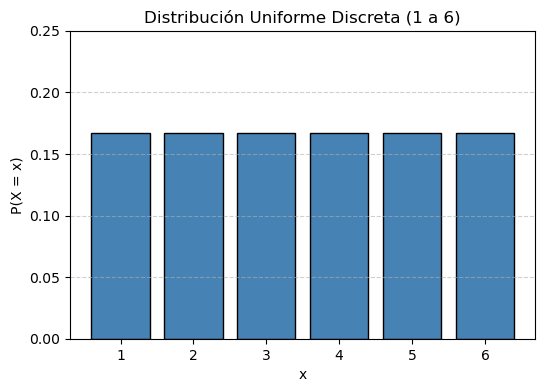

In [2]:
# Valores y función de probabilidad
n = 6
x = np.arange(1, n + 1)
pmf = randint.pmf(x, 1, n + 1)

# Cálculo de esperanza y varianza
esperanza = (n + 1) / 2
varianza = (n**2 - 1) / 12

print(f"Esperanza: {esperanza:.4f}")
print(f"Varianza: {varianza:.4f}")

# Gráfico
plt.figure(figsize=(6, 4))
plt.bar(x, pmf, color='steelblue', edgecolor='black')
plt.title('Distribución Uniforme Discreta (1 a 6)')
plt.xlabel('x')
plt.ylabel('P(X = x)')
plt.xticks(x)
plt.ylim(0, 0.25)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

## 2. Distribución Bernoulli

La distribución **Bernoulli** modela un experimento con dos posibles resultados: éxito (valor 1) con probabilidad $p$, y fracaso (valor 0) con probabilidad $1 - p$.

$$
f(x) =
\begin{cases}
p, & \text{si } x = 1, \\
1 - p, & \text{si } x = 0, \\
0, & \text{en otro caso}.
\end{cases}
$$

**Propiedades**:
- Esperanza: $\mathbb{E}[X] = p$
- Varianza: $\mathrm{Var}(X) = p(1 - p)$

### Ejemplo

La variable aleatoria $X$ representa el resultado de un experimento con dos posibles salidas: éxito (1) con probabilidad $p = 0.3$ y fracaso (0) con probabilidad $1 - p = 0.7$.

$$
P(X = x) =
\begin{cases}
0.3, & x = 1 \\
0.7, & x = 0 \\
0,   & \text{en otro caso}
\end{cases}
$$

Esperanza: 0.3000
Varianza: 0.2100


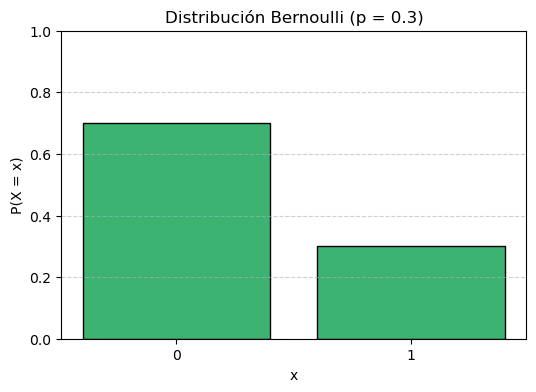

In [3]:
# Parámetro
p = 0.3
x = [0, 1]
pmf = bernoulli.pmf(x, p)

# Cálculo de esperanza y varianza
esperanza = p
varianza = p * (1 - p)

print(f"Esperanza: {esperanza:.4f}")
print(f"Varianza: {varianza:.4f}")

# Gráfico
plt.figure(figsize=(6, 4))
plt.bar(x, pmf, color='mediumseagreen', edgecolor='black')
plt.title('Distribución Bernoulli (p = 0.3)')
plt.xlabel('x')
plt.ylabel('P(X = x)')
plt.xticks(x)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

## 3. Distribución binomial

La distribución **binomial** describe el número de éxitos en $n$ ensayos independientes de tipo Bernoulli, cada uno con probabilidad de éxito $p$:

$$
f(x) = \binom{n}{x} p^x (1 - p)^{n - x}, \quad x = 0, 1, \dots, n
$$

Se denota como $X \sim \text{Bin}(n, p)$.

**Propiedades**:
- Esperanza: $\mathbb{E}[X] = np$
- Varianza: $\mathrm{Var}(X) = np(1 - p)$

### Ejemplo

Se considera una variable aleatoria $X \sim \text{Bin}(n = 10, p = 0.5)$, que modela el número de éxitos en 10 ensayos independientes con probabilidad de éxito 0.5 en cada uno.

La función de masa de probabilidad es:

$$
P(X = x) = \binom{10}{x} (0.5)^x (0.5)^{10 - x}, \quad x = 0, 1, \dots, 10
$$

Esperanza: 5.0000
Varianza: 2.5000


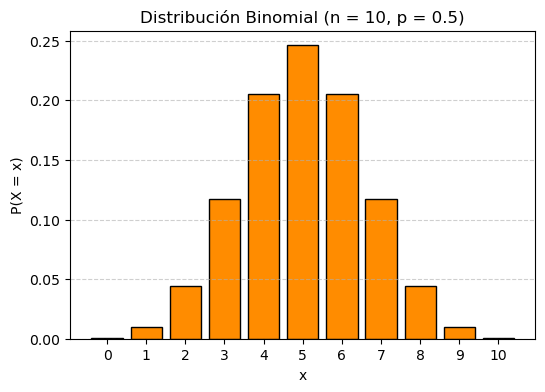

In [4]:
# Parámetros
n, p = 10, 0.5
x = np.arange(0, n + 1)
pmf = binom.pmf(x, n, p)

# Cálculo de esperanza y varianza
esperanza = n * p
varianza = n * p * (1 - p)

print(f"Esperanza: {esperanza:.4f}")
print(f"Varianza: {varianza:.4f}")

# Gráfico
plt.figure(figsize=(6, 4))
plt.bar(x, pmf, color='darkorange', edgecolor='black')
plt.title('Distribución Binomial (n = 10, p = 0.5)')
plt.xlabel('x')
plt.ylabel('P(X = x)')
plt.xticks(x)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

## 4. Distribución Poisson

La distribución **Poisson** se utiliza para modelar el número de ocurrencias de un evento en un intervalo de tiempo o espacio cuando la tasa de ocurrencia es constante e igual a $\lambda$.

$$
f(x) = \frac{e^{-\lambda} \lambda^x}{x!}, \quad x = 0, 1, 2, \dots
$$

Se denota como $X \sim \text{Poisson}(\lambda)$.

**Propiedades**:
- Esperanza: $\mathbb{E}[X] = \lambda$
- Varianza: $\mathrm{Var}(X) = \lambda$

### Ejemplo

La variable aleatoria $X \sim \text{Poisson}(\lambda = 3)$ modela el número de ocurrencias de un evento en un intervalo cuando la tasa media de ocurrencia es $\lambda = 3$.

Su función de masa de probabilidad es:

$$
P(X = x) = \frac{e^{-3} 3^x}{x!}, \quad x = 0, 1, 2, \dots
$$

Se representa gráficamente hasta $x = 10$.

Esperanza: 3
Varianza: 3


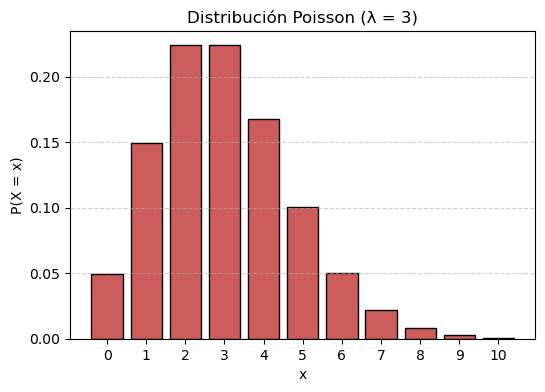

In [5]:
# Parámetro
lamb = 3
x = np.arange(0, 11)
pmf = poisson.pmf(x, mu=lamb)

# Cálculo de esperanza y varianza
esperanza = lamb
varianza = lamb

print(f"Esperanza: {esperanza}")
print(f"Varianza: {varianza}")

# Gráfico
plt.figure(figsize=(6, 4))
plt.bar(x, pmf, color='indianred', edgecolor='black')
plt.title('Distribución Poisson (λ = 3)')
plt.xlabel('x')
plt.ylabel('P(X = x)')
plt.xticks(x)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Variables aleatorias continuas

Una variable aleatoria se considera **continua** cuando puede asumir cualquier valor dentro de un intervalo del conjunto de los números reales. Formalmente, una variable aleatoria $X$ es continua si su función de distribución acumulativa $F(x)$ es continua en todo su dominio y posee una derivada (excepto, a lo sumo, en un número finito de puntos). Esta derivada, denotada por $f(x)$, se llama **función de densidad de probabilidad (fdp)**.

La función de densidad $f(x)$ cumple las siguientes propiedades fundamentales:

1. $f(x) \geq 0$ para todo $x$,
2. $\displaystyle \int_{-\infty}^{\infty} f(x)\,dx = 1$.

La probabilidad de que una variable continua tome un valor exacto es cero: $P(X = x) = 0$ para todo $x$. En cambio, las probabilidades se determinan sobre intervalos, por ejemplo: $P(a \leq X \leq b) = \int_a^b f(x)\,dx$.

Entre las distribuciones continuas más relevantes se encuentra la **distribución uniforme continua**, definida por una densidad constante en un intervalo dado, y la **distribución normal**, cuya función de densidad tiene forma de campana. Estas distribuciones permiten modelar fenómenos naturales, procesos físicos, resultados de medición y errores aleatorios.

## Distribución uniforme continua

La **distribución uniforme continua** describe una variable aleatoria que puede tomar cualquier valor dentro de un intervalo acotado $(a, b)$, en el cual todos los valores son igualmente probables. Se denota como $X \sim \text{Unif}(a, b)$ y su función de densidad es constante en dicho intervalo.

### Función de densidad de probabilidad (fdp)

$$
f(x) =
\begin{cases}
\frac{1}{b - a}, & \text{si } a < x < b, \\
0, & \text{en otro caso}.
\end{cases}
$$

### Función de distribución acumulada (cdf)

$$
F(x) =
\begin{cases}
0, & x < a, \\
\frac{x - a}{b - a}, & a \leq x \leq b, \\
1, & x > b.
\end{cases}
$$

### Propiedades

- Esperanza: $\mathbb{E}[X] = \frac{a + b}{2}$
- Varianza: $\mathrm{Var}(X) = \frac{(b - a)^2}{12}$

Esta distribución se aplica cuando no existe preferencia por ningún valor dentro del intervalo y se asume una probabilidad uniforme sobre él.

Esperanza: 5.0000
Varianza: 3.0000


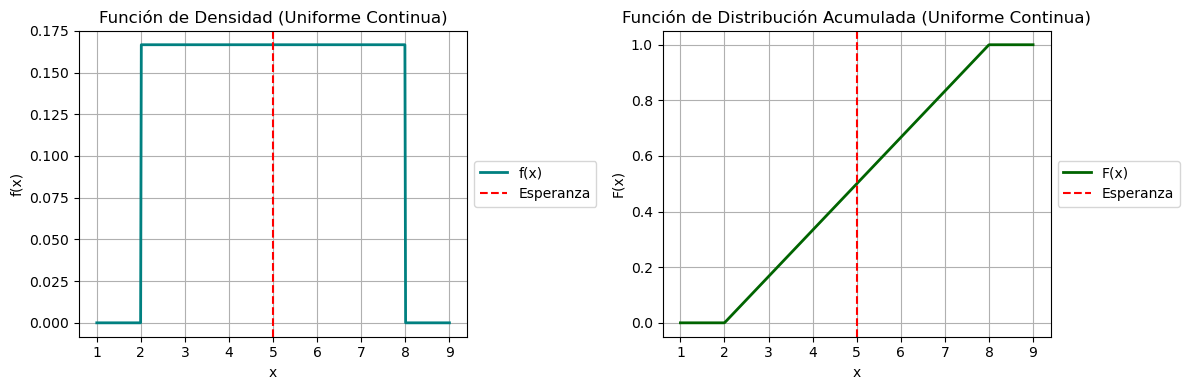

In [6]:
# Parámetros de la distribución
a, b = 2, 8
dist = uniform(loc=a, scale=b - a)

# Dominio para graficar
x = np.linspace(a - 1, b + 1, 500)
pdf = dist.pdf(x)
cdf = dist.cdf(x)

# Cálculo de esperanza y varianza
esperanza = dist.mean()
varianza = dist.var()

print(f"Esperanza: {esperanza:.4f}")
print(f"Varianza: {varianza:.4f}")

# Gráficos: PDF y CDF lado a lado
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico de densidad (PDF)
axs[0].plot(x, pdf, color='teal', lw=2, label='f(x)')
axs[0].axvline(esperanza, color='red', linestyle='--', label='Esperanza')
axs[0].set_title('Función de Densidad (Uniforme Continua)')
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')
axs[0].grid(True)
axs[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Gráfico de distribución acumulada (CDF)
axs[1].plot(x, cdf, color='darkgreen', lw=2, label='F(x)')
axs[1].axvline(esperanza, color='red', linestyle='--', label='Esperanza')
axs[1].set_title('Función de Distribución Acumulada (Uniforme Continua)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('F(x)')
axs[1].grid(True)
axs[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.show()

## Distribución normal

La **distribución normal** es una de las distribuciones de probabilidad más importantes en estadística, tanto por su valor teórico como por su presencia en fenómenos reales. Muchos procesos naturales, físicos y sociales presentan comportamientos que pueden modelarse mediante esta distribución, especialmente cuando se trata de la suma de múltiples factores aleatorios pequeños.

Una variable aleatoria $X$ tiene distribución normal con esperanza $\mu$ y varianza $\sigma^2$ si se denota $X \sim N(\mu, \sigma^2)$.

### Función de densidad de probabilidad (pdf)

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right), \quad -\infty < x < \infty
$$

Esta función genera una curva simétrica en forma de campana centrada en $x = \mu$. La dispersión de los datos alrededor de la media está determinada por $\sigma^2$.

### Función de distribución acumulada (cdf)

La función de distribución acumulada de una variable aleatoria continua $X$ se define como:

$$
F(x) = P(X \leq x) = \int_{-\infty}^{x} f(t)\,dt
$$

En el caso de la distribución normal, esta integral **no tiene una forma cerrada en términos de funciones elementales**, por lo que se evalúa numéricamente o mediante tablas.

Para la **normal estándar**, definida como $Z \sim N(0, 1)$, la CDF se denota por $\Phi(z)$:

$$
\Phi(z) = P(Z \leq z) = \int_{-\infty}^{z} \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{t^2}{2}\right)\,dt
$$

Esta función es fundamental para transformar cualquier variable normal a su forma estandarizada:

$$
Z = \frac{X - \mu}{\sigma}
$$

lo que permite usar tablas o funciones computacionales para determinar probabilidades asociadas a cualquier distribución normal.

### Propiedades

- Esperanza: $\mathbb{E}[X] = \mu$
- Varianza: $\mathrm{Var}(X) = \sigma^2$
- Simetría respecto a $\mu$
- $P(X = x) = 0$ para cualquier valor puntual
- Aproximaciones útiles:
  - $P(\mu \pm \sigma) \approx 68.3\%$
  - $P(\mu \pm 2\sigma) \approx 95.4\%$
  - $P(\mu \pm 3\sigma) \approx 99.7\%$

Esta distribución es fundamental en estadística y probabilidad, especialmente por su rol central en el Teorema Central del Límite.

Esperanza: 0.0000
Varianza: 1.0000


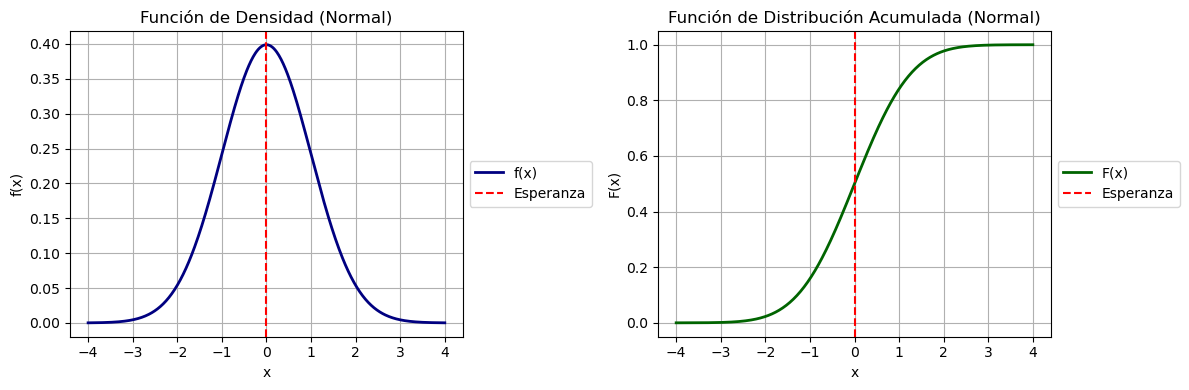

In [7]:
# Parámetros de la distribución normal
mu = 0
sigma = 1
dist = norm(loc=mu, scale=sigma)

# Dominio para graficar
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 500)
pdf = dist.pdf(x)
cdf = dist.cdf(x)

# Cálculo de esperanza y varianza
esperanza = dist.mean()
varianza = dist.var()

print(f"Esperanza: {esperanza:.4f}")
print(f"Varianza: {varianza:.4f}")

# Gráficos: PDF y CDF lado a lado
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Función de densidad (PDF)
axs[0].plot(x, pdf, color='navy', lw=2, label='f(x)')
axs[0].axvline(esperanza, color='red', linestyle='--', label='Esperanza')
axs[0].set_title('Función de Densidad (Normal)')
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')
axs[0].grid(True)
axs[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Función de distribución acumulada (CDF)
axs[1].plot(x, cdf, color='darkgreen', lw=2, label='F(x)')
axs[1].axvline(esperanza, color='red', linestyle='--', label='Esperanza')
axs[1].set_title('Función de Distribución Acumulada (Normal)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('F(x)')
axs[1].grid(True)
axs[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.show()

## Distribución exponencial

La **distribución exponencial** es una de las distribuciones continuas más utilizadas para modelar **tiempos de espera** entre eventos que ocurren de manera aleatoria pero con una tasa constante. Es especialmente útil en contextos como la vida útil de componentes, el tiempo entre llegadas en procesos de Poisson o la espera para eventos no acumulativos.

Se dice que una variable aleatoria continua $X$ tiene distribución exponencial con parámetro $\lambda > 0$ si se denota:

$$
X \sim \text{Exp}(\lambda)
$$

### Función de densidad de probabilidad (fdp)

$$
f(x) =
\begin{cases}
\lambda e^{-\lambda x}, & x > 0, \\
0, & \text{en otro caso}.
\end{cases}
$$

Esta función es **monótonamente decreciente** y alcanza su valor máximo en $x = 0$.

### Función de distribución acumulada (cdf)

$$
F(x) =
\begin{cases}
1 - e^{-\lambda x}, & x > 0, \\
0, & \text{en otro caso}.
\end{cases}
$$

La CDF representa la probabilidad acumulada de que el evento ocurra antes de tiempo $x$. Su crecimiento es **rápido al principio** y se aplana conforme $x$ crece.

### Propiedades

- Esperanza: $\mathbb{E}[X] = \dfrac{1}{\lambda}$
- Varianza: $\mathrm{Var}(X) = \dfrac{1}{\lambda^2}$
- Soporte: $(0, \infty)$
- Es una distribución con **propiedad de ausencia de memoria**, es decir:

$$
P(X > a + b \mid X > a) = P(X > b)
$$

Esta propiedad implica que la distribución no "recuerda" cuánto tiempo ha transcurrido y es clave para modelar procesos sin historial acumulativo.

Esperanza: 0.6667
Varianza: 0.4444


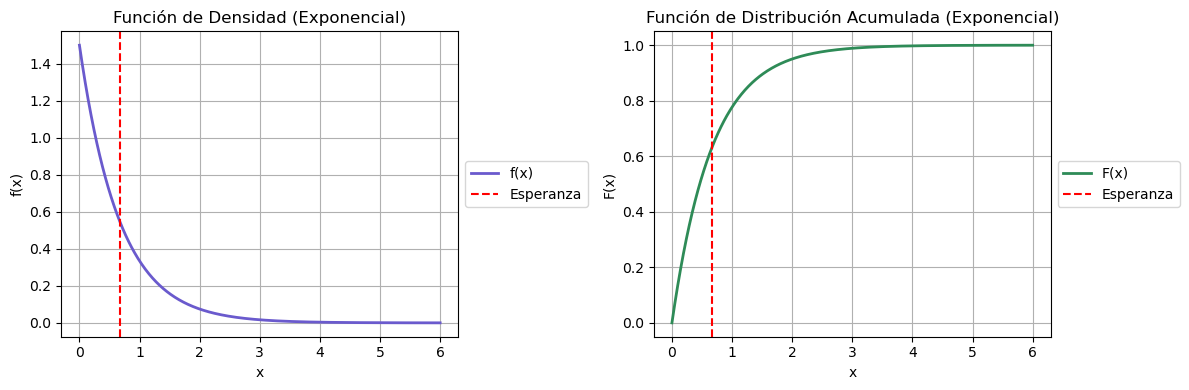

In [8]:
# Parámetro de la distribución exponencial
lambda_exp = 1.5
dist = expon(scale=1 / lambda_exp)

# Dominio para graficar
x = np.linspace(0, 6, 500)
pdf = dist.pdf(x)
cdf = dist.cdf(x)

# Cálculo de esperanza y varianza
esperanza = dist.mean()
varianza = dist.var()

print(f"Esperanza: {esperanza:.4f}")
print(f"Varianza: {varianza:.4f}")

# Gráficos: PDF y CDF lado a lado
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Función de densidad (PDF)
axs[0].plot(x, pdf, color='slateblue', lw=2, label='f(x)')
axs[0].axvline(esperanza, color='red', linestyle='--', label='Esperanza')
axs[0].set_title('Función de Densidad (Exponencial)')
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')
axs[0].grid(True)
axs[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Función de distribución acumulada (CDF)
axs[1].plot(x, cdf, color='seagreen', lw=2, label='F(x)')
axs[1].axvline(esperanza, color='red', linestyle='--', label='Esperanza')
axs[1].set_title('Función de Distribución Acumulada (Exponencial)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('F(x)')
axs[1].grid(True)
axs[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.show()

## Distribución gamma

La **distribución gamma** es una distribución de probabilidad continua que permite modelar tiempos de espera acumulados hasta la ocurrencia de un cierto número de eventos. Se utiliza, por ejemplo, en procesos de cola, tiempos de vida de sistemas o modelos de confiabilidad. Es una generalización de la distribución exponencial, y una variable con distribución exponencial puede interpretarse como un caso particular de gamma cuando el parámetro de forma es igual a 1.

Una variable aleatoria continua $X$ tiene distribución gamma con **parámetro de forma** $\alpha > 0$ y **parámetro de tasa** $\lambda > 0$ si se denota:

$$
X \sim \text{Gamma}(\alpha, \lambda)
$$

### Función de densidad de probabilidad (fdp)

$$
f(x) =
\begin{cases}
\dfrac{\lambda^\alpha x^{\alpha - 1} e^{-\lambda x}}{\Gamma(\alpha)}, & x > 0, \\
0, & \text{en otro caso}.
\end{cases}
$$

Donde $\Gamma(\alpha)$ es la función gamma, una generalización del factorial para números reales, definida por:

$$
\Gamma(\alpha) = \int_0^\infty t^{\alpha - 1} e^{-t} dt
$$

Se cumple que $\Gamma(n) = (n - 1)!$ cuando $\alpha$ es un entero positivo.

#### Función de distribución acumulada (cdf)

La CDF de la distribución gamma no tiene una forma cerrada general, pero se expresa mediante la función gamma incompleta:

$$
F(x) = \frac{1}{\Gamma(\alpha)} \int_0^x \lambda^\alpha t^{\alpha - 1} e^{-\lambda t} dt
$$

Se calcula numéricamente y está disponible en la mayoría de paquetes estadísticos.

### Propiedades

- Esperanza: $\mathbb{E}[X] = \dfrac{\alpha}{\lambda}$
- Varianza: $\mathrm{Var}(X) = \dfrac{\alpha}{\lambda^2}$
- Soporte: $x > 0$
- La distribución gamma es útil para modelar tiempos de espera acumulados: si $X_1, ..., X_n$ son tiempos entre eventos i.i.d. exponenciales con parámetro $\lambda$, entonces $S_n = X_1 + \dots + X_n \sim \text{Gamma}(n, \lambda)$.

Esperanza: 1.5000
Varianza: 0.7500


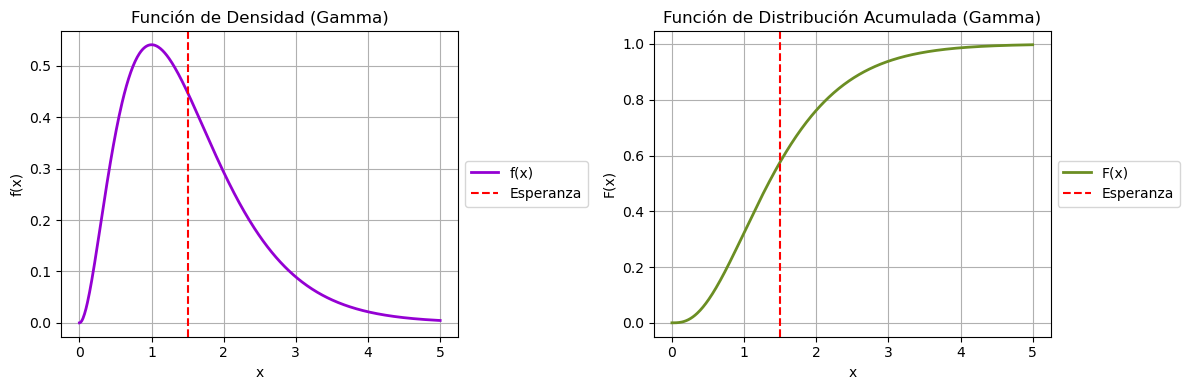

In [9]:
# Parámetros de la distribución gamma
alpha = 3     # parámetro de forma
lamb = 2      # parámetro de tasa
dist = gamma(a=alpha, scale=1 / lamb)

# Dominio para graficar
x = np.linspace(0, 5, 500)
pdf = dist.pdf(x)
cdf = dist.cdf(x)

# Cálculo de esperanza y varianza
esperanza = dist.mean()
varianza = dist.var()

print(f"Esperanza: {esperanza:.4f}")
print(f"Varianza: {varianza:.4f}")

# Gráficos: PDF y CDF
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# PDF
axs[0].plot(x, pdf, color='darkviolet', lw=2, label='f(x)')
axs[0].axvline(esperanza, color='red', linestyle='--', label='Esperanza')
axs[0].set_title('Función de Densidad (Gamma)')
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')
axs[0].grid(True)
axs[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# CDF
axs[1].plot(x, cdf, color='olivedrab', lw=2, label='F(x)')
axs[1].axvline(esperanza, color='red', linestyle='--', label='Esperanza')
axs[1].set_title('Función de Distribución Acumulada (Gamma)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('F(x)')
axs[1].grid(True)
axs[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.show()

## Distribución beta

La **distribución beta** es una distribución continua de dos parámetros definida sobre el intervalo $(0, 1)$ y ampliamente utilizada para modelar proporciones, probabilidades y otras variables que se encuentran acotadas entre 0 y 1. Su flexibilidad permite representar distintos tipos de comportamientos de concentración o dispersión, dependiendo de los valores de los parámetros.

Una variable aleatoria $X$ tiene distribución beta con parámetros $a > 0$ y $b > 0$ si se denota:

$$
X \sim \text{Beta}(a, b)
$$

### Función de densidad de probabilidad (fdp)

$$
f(x) =
\begin{cases}
\dfrac{1}{B(a, b)}\, x^{a - 1}(1 - x)^{b - 1}, & 0 < x < 1, \\
0, & \text{en otro caso},
\end{cases}
$$

donde $B(a, b)$ es la **función beta**:

$$
B(a, b) = \int_0^1 t^{a - 1}(1 - t)^{b - 1} dt = \dfrac{\Gamma(a)\Gamma(b)}{\Gamma(a + b)}
$$

y $\Gamma(\cdot)$ es la función gamma.

### Función de distribución acumulada (cdf)

La función de distribución acumulada no tiene una forma cerrada en términos elementales y se define como:

$$
F(x) = \frac{1}{B(a, b)} \int_0^x t^{a - 1}(1 - t)^{b - 1} dt
$$

Este valor se conoce como la **función beta incompleta** y se evalúa numéricamente.

### Propiedades

- Esperanza: $\mathbb{E}[X] = \dfrac{a}{a + b}$
- Varianza: $\mathrm{Var}(X) = \dfrac{ab}{(a + b)^2(a + b + 1)}$
- Soporte: $x \in (0, 1)$
- Cuando $a = b = 1$, la beta se reduce a una distribución uniforme continua sobre $(0, 1)$.

La distribución beta también puede obtenerse a partir de dos variables independientes $X \sim \text{Gamma}(a, \lambda)$ y $Y \sim \text{Gamma}(b, \lambda)$ como:

$$
\frac{X}{X + Y} \sim \text{Beta}(a, b)
$$

Esperanza: 0.2857
Varianza: 0.0255


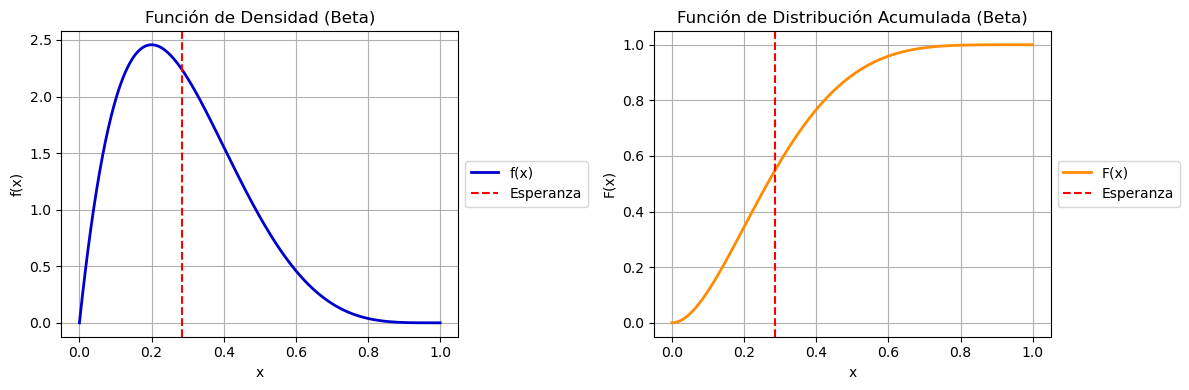

In [10]:
# Parámetros de la distribución beta
a, b_param = 2, 5
dist = beta(a=a, b=b_param)

# Dominio para graficar en (0, 1)
x = np.linspace(0, 1, 500)
pdf = dist.pdf(x)
cdf = dist.cdf(x)

# Cálculo de esperanza y varianza
esperanza = dist.mean()
varianza = dist.var()

print(f"Esperanza: {esperanza:.4f}")
print(f"Varianza: {varianza:.4f}")

# Gráficos: PDF y CDF lado a lado
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Función de densidad (PDF)
axs[0].plot(x, pdf, color='mediumblue', lw=2, label='f(x)')
axs[0].axvline(esperanza, color='red', linestyle='--', label='Esperanza')
axs[0].set_title('Función de Densidad (Beta)')
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')
axs[0].grid(True)
axs[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Función de distribución acumulada (CDF)
axs[1].plot(x, cdf, color='darkorange', lw=2, label='F(x)')
axs[1].axvline(esperanza, color='red', linestyle='--', label='Esperanza')
axs[1].set_title('Función de Distribución Acumulada (Beta)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('F(x)')
axs[1].grid(True)
axs[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.show()

# Simulación de variables aleatorias

La simulación de variables aleatorias es una técnica fundamental en estadística computacional y teoría de la probabilidad. Su objetivo es generar valores numéricos que sigan el comportamiento probabilístico de una distribución dada, permitiendo el estudio de fenómenos aleatorios mediante modelos computacionales.

Esta sección presenta los métodos clásicos y computacionales para simular variables aleatorias, incluyendo:

- **Generación de números aleatorios uniformes** mediante métodos congruenciales.
- **Simulación de variables continuas y discretas** a partir de transformaciones de variables uniformes:
  - Método de la **transformada inversa**
  - Método de **aceptación y rechazo**
- **Simulación directa** usando funciones estadísticas disponibles en bibliotecas como `NumPy` y `SciPy`.

La generación de variables aleatorias se fundamenta en la capacidad de producir números **uniformemente distribuidos en el intervalo (0,1)**. A partir de esta base, es posible construir observaciones que sigan otras distribuciones mediante transformaciones teóricas.

## Generación de números uniformes: Método congruencial multiplicativo

El primer paso para simular variables aleatorias consiste en generar números pseudoaleatorios que sigan una **distribución uniforme** en el intervalo $(0, 1)$. Una de las técnicas más utilizadas para este propósito es el **método congruencial multiplicativo**, una variante del método congruencial lineal.

Este método genera una secuencia de números mediante la siguiente relación recursiva:

$$
X_{n+1} = (a \cdot X_n) \mod m
$$

donde:

- $X_0$ es la **semilla inicial**,
- $a$ es el **multiplicador**,
- $m$ es el **módulo**,
- y $X_n$ es el $n$-ésimo número generado.

Los valores normalizados se obtienen dividiendo por $m$:

$$
U_n = \frac{X_n}{m}
$$

Estos valores están en el intervalo $(0, 1)$ y se utilizan como entradas para simular otras distribuciones mediante transformaciones.

### Recomendaciones para los parámetros

Para garantizar un buen comportamiento estadístico de la secuencia generada, se sugiere:

- Elegir un módulo $m$ grande (por ejemplo, una potencia de 2 o un primo grande),
- Elegir un multiplicador $a$ tal que $a$ sea **primitivo módulo $m$** o satisfaga ciertas condiciones aritméticas,
- Evitar semillas $X_0 = 0$, pues conducen a secuencias degeneradas.

Este método se utiliza como base para algoritmos más avanzados de simulación y en muchas implementaciones computacionales básicas de generación de números aleatorios.

### Generación de números pseudoaleatorios U(0,1)

A continuación se implementa el método congruencial multiplicativo para generar una secuencia de valores pseudoaleatorios distribuidos uniformemente en el intervalo $(0, 1)$.

Se utilizan los siguientes parámetros:

- Módulo: $m = 2^{31}$
- Multiplicador: $a = 65539$
- Semilla inicial: $x_0 = 123456789$
- Tamaño de la muestra: $n = 10,\!000$

Los valores generados se normalizan dividiendo entre $m$:

$$
U_n = \frac{X_n}{m}
$$

Finalmente, se representa el histograma de los valores generados para verificar visualmente la uniformidad de la muestra.


In [11]:
def metodo_congruencial_multiplicativo(a, m, x0, n):
    """Genera n números pseudoaleatorios U(0,1) usando el método congruencial multiplicativo"""
    x = x0
    resultados = []
    for _ in range(n):
        x = (a * x) % m
        resultados.append(x / m)
    return np.array(resultados)

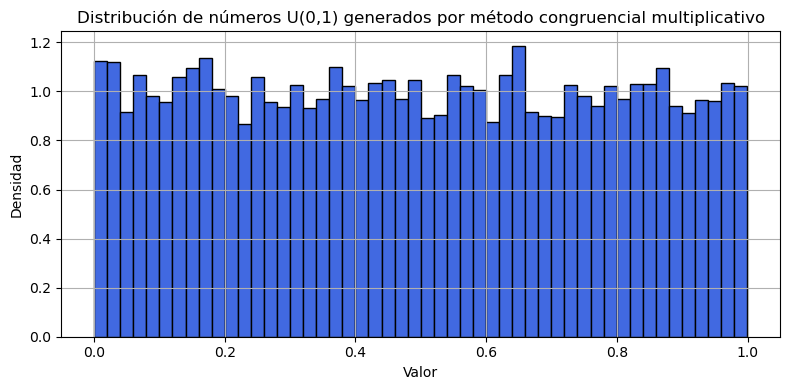

In [12]:
# Parámetros recomendados
a = 65539       # multiplicador
m = 2**31       # módulo (entero grande)
x0 = 199904  # semilla inicial
n = 10000       # cantidad de números a generar

# Generar números uniformes en (0,1)
uniformes = metodo_congruencial_multiplicativo(a, m, x0, n)

# Visualización de la distribución
plt.figure(figsize=(8, 4))
plt.hist(uniformes, bins=50, density=True, color='royalblue', edgecolor='black')
plt.title('Distribución de números U(0,1) generados por método congruencial multiplicativo')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.grid(True)
plt.tight_layout()
plt.show()

## Simulación mediante el método de la transformada inversa

El **método de la transformada inversa** permite simular variables aleatorias continuas utilizando una transformación explícita de una variable uniforme $U \sim \text{Unif}(0, 1)$. Este método se basa en el hecho de que, si $F(x)$ es la función de distribución acumulada (cdf) de una variable aleatoria $X$, entonces:

$$
X = F^{-1}(U)
$$

genera valores de $X$ que siguen dicha distribución.

Este enfoque requiere que la función de distribución acumulada $F(x)$ sea **monótonamente creciente** y **invertible**. Si se cumple esta condición, entonces es posible simular valores de la variable aleatoria deseada mediante la **función cuantil** $F^{-1}(u)$.

### Ejemplo: Distribución exponencial

Sea $X \sim \text{Exp}(\lambda)$ una variable aleatoria exponencial con parámetro $\lambda > 0$. Su función de distribución acumulada es:

$$
F(x) = 1 - e^{-\lambda x}, \quad x > 0
$$

Para simular valores de esta distribución, se despeja la inversa:

$$
u = 1 - e^{-\lambda x} \quad \Rightarrow \quad x = -\frac{1}{\lambda} \ln(1 - u)
$$

Entonces, si $U \sim \text{Unif}(0, 1)$, el valor transformado:

$$
X = -\frac{1}{\lambda} \ln(1 - U)
$$

tiene distribución exponencial con parámetro $\lambda$.

### Simulación de una variable exponencial con el método de la transformada inversa

Se desea simular una variable aleatoria $X \sim \text{Exp}(\lambda)$ utilizando el método de la transformada inversa. Partimos de una variable $U \sim \text{Unif}(0, 1)$ y aplicamos la transformación:

$$
X = -\frac{1}{\lambda} \ln(1 - U)
$$

Esto genera una muestra con distribución exponencial con parámetro $\lambda$.  
A continuación se compara el histograma de la muestra simulada con la función de densidad teórica, y se muestra la **esperanza empírica** frente a la **esperanza teórica**.

Esperanza empírica: 0.6716
Esperanza teórica:  0.6667


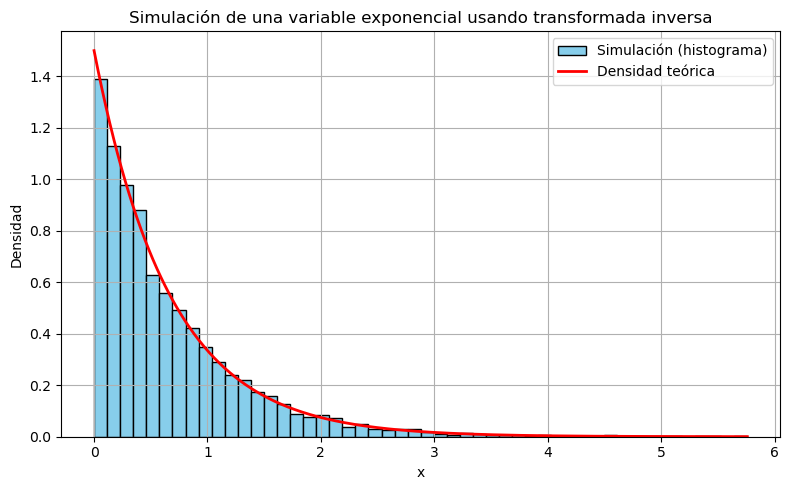

In [13]:
# Parámetro de la distribución exponencial
lambda_exp = 1.5
n = 10000

# Simulación usando el método de la transformada inversa
u = np.random.uniform(0, 1, n)
x_simulado = -np.log(1 - u) / lambda_exp

# Cálculo de esperanza empírica
esperanza_empirica = np.mean(x_simulado)
esperanza_teorica = 1 / lambda_exp

print(f"Esperanza empírica: {esperanza_empirica:.4f}")
print(f"Esperanza teórica:  {esperanza_teorica:.4f}")

# Comparación con la densidad teórica
x_vals = np.linspace(0, np.max(x_simulado), 500)
pdf_teorica = expon(scale=1 / lambda_exp).pdf(x_vals)

# Visualización
plt.figure(figsize=(8, 5))
plt.hist(x_simulado, bins=50, density=True, color='skyblue', edgecolor='black', label='Simulación (histograma)')
plt.plot(x_vals, pdf_teorica, 'r-', lw=2, label='Densidad teórica')
plt.title('Simulación de una variable exponencial usando transformada inversa')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Simulación mediante el método de aceptación y rechazo

El **método de aceptación y rechazo** es una técnica general para simular valores de una variable aleatoria $X$ cuya distribución de densidad $f(x)$ no tiene una forma fácilmente invertible. La idea básica consiste en generar candidatos a partir de una distribución auxiliar más simple y luego decidir si se aceptan o no según una regla de comparación probabilística.

### Algoritmo general

Dado que se desea simular una variable con densidad $f(x)$, se elige:

- Una función de densidad auxiliar $g(x)$ desde la cual sea fácil simular valores.
- Una constante $c > 0$ tal que $f(x) \leq c g(x)$ para todo $x$.

El algoritmo sigue los siguientes pasos:

1. Generar $Y$ a partir de la densidad $g(x)$.
2. Generar $U \sim \text{Unif}(0,1)$.
3. Si $U \leq \dfrac{f(Y)}{c g(Y)}$, **aceptar** $Y$ como valor de $X$.
4. Si no, **rechazar** y volver al paso 1.

### Justificación

El método se basa en que la proporción de valores aceptados sigue la densidad deseada $f(x)$. El valor de $c$ debe ser tal que **cubra completamente** a $f(x)$ sobre todo el soporte de $x$. Un valor más ajustado de $c$ mejora la eficiencia del método (mayor tasa de aceptación).

### Aplicaciones

Este método es útil para simular distribuciones como la **beta** o la **gamma**, especialmente cuando sus parámetros dificultan el uso directo de la transformada inversa.

### Simulación de una variable beta usando el método de aceptación y rechazo

Para simular una variable aleatoria $X \sim \text{Beta}(3, 9)$ se utiliza el **método de aceptación y rechazo**, tomando como función auxiliar la distribución uniforme sobre el intervalo $(0,1)$.

Dado que $g(x) = 1$ en $(0,1)$, la constante $c$ se elige como:

$$
c = \max_{x \in (0,1)} f(x)
$$

donde $f(x)$ es la densidad de la beta.  
Luego se generan candidatos $Y \sim \text{Unif}(0,1)$ y se acepta $Y$ si:

$$
U \leq \frac{f(Y)}{c}, \quad U \sim \text{Unif}(0,1)
$$

La tasa de aceptación observada indica la eficiencia del método. Finalmente, se compara el histograma de los valores aceptados con la densidad teórica.

Tasa de aceptación: 0.3047


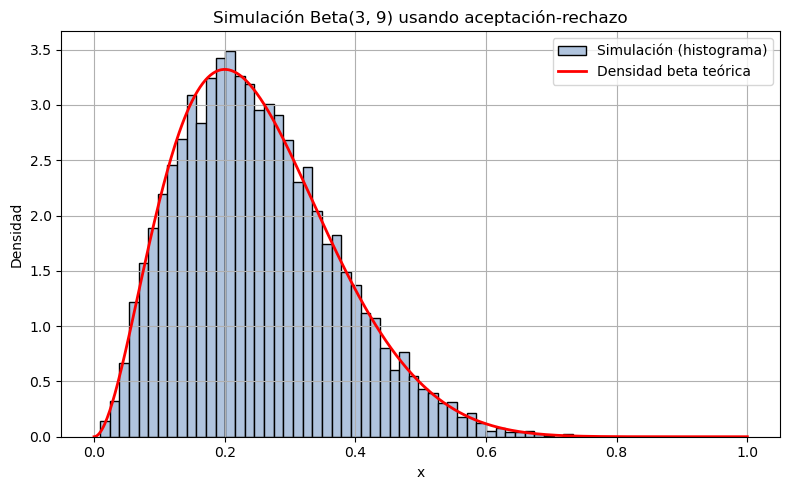

In [14]:
# Parámetros de la distribución beta objetivo
a, b_param = 3, 9
f = beta(a, b_param)

# Constante c ≥ max f(x), dado que g(x) = 1 en (0,1)
x_vals = np.linspace(0, 1, 1000)
c = np.max(f.pdf(x_vals))

# Método de aceptación-rechazo
n_samples = 10000
samples = []
attempts = 0

while len(samples) < n_samples:
    y = np.random.uniform(0, 1)  # propuesta de g(x)
    u = np.random.uniform(0, 1)  # para comparar con f(y)/c
    if u <= f.pdf(y) / c:
        samples.append(y)
    attempts += 1

samples = np.array(samples)

# Mostrar eficiencia
tasa_aceptacion = len(samples) / attempts
print(f"Tasa de aceptación: {tasa_aceptacion:.4f}")

# Comparación con la densidad teórica
x = np.linspace(0, 1, 500)
pdf = f.pdf(x)

plt.figure(figsize=(8, 5))
plt.hist(samples, bins=50, density=True, color='lightsteelblue', edgecolor='black', label='Simulación (histograma)')
plt.plot(x, pdf, 'r-', lw=2, label='Densidad beta teórica')
plt.title('Simulación Beta(3, 9) usando aceptación-rechazo')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Función generadora de momentos (FGM)

La **función generadora de momentos** (FGM) es una herramienta analítica que permite obtener todos los momentos de una variable aleatoria a partir de una única expresión matemática. Se define tanto para variables discretas como continuas y se utiliza ampliamente en teoría de la probabilidad y estadística matemática.

## Definición

Sea $X$ una variable aleatoria. Su función generadora de momentos se define como:

$$
M(t) = \mathbb{E}[e^{tX}]
$$

siempre que esta expectativa exista para valores reales de $t$ en un intervalo que contenga al menos $t = 0$.

- Para variables **discretas**:

$$
M(t) = \sum_{x} e^{tx} P(X = x)
$$

- Para variables **continuas**:

$$
M(t) = \int_{-\infty}^{\infty} e^{tx} f(x)\,dx
$$

## Propiedades

1. Si $M(t)$ existe, entonces todos los momentos de $X$ existen y se obtienen mediante derivación:

$$
\mathbb{E}[X^k] = M^{(k)}(0)
$$

donde $M^{(k)}(0)$ es la $k$-ésima derivada de $M(t)$ evaluada en $t = 0$.

2. La FGM **caracteriza completamente** a la distribución de una variable aleatoria: si dos variables tienen la misma FGM, entonces tienen la misma distribución (teorema de unicidad).

3. Si $X$ e $Y$ son independientes, entonces:

$$
M_{X+Y}(t) = M_X(t) \cdot M_Y(t)
$$

## Aplicaciones

- Obtener la **esperanza** y la **varianza** de una variable aleatoria sin integrar directamente su densidad o masa.
- Determinar la **distribución** de una suma de variables independientes.
- Verificar si una variable aleatoria **converge en distribución** a otra mediante su FGM.

La FGM es especialmente útil para distribuciones clásicas como la **Poisson**, **binomial**, **normal** y **exponencial**.

# Función característica (FC)

La **función característica** es una herramienta fundamental en teoría de la probabilidad que, al igual que la función generadora de momentos, permite caracterizar completamente la distribución de una variable aleatoria. Tiene la ventaja de existir para **toda variable aleatoria**, ya que su definición siempre converge.

## Definición

Sea $X$ una variable aleatoria (discreta o continua). La **función característica** de $X$ se define como:

$$
\varphi_X(t) = \mathbb{E}[e^{itX}] = 
\begin{cases}
\sum_x e^{itx} P(X = x), & \text{si } X \text{ es discreta}, \\
\int_{-\infty}^\infty e^{itx} f(x)\,dx, & \text{si } X \text{ es continua},
\end{cases}
$$

donde $t$ es un número real y $i$ es la unidad imaginaria.

## Propiedades

- La función característica **siempre existe** (a diferencia de la FGM).
- Permite obtener momentos de la distribución mediante derivación:

$$
\mathbb{E}[X^n] = \frac{1}{i^n} \varphi_X^{(n)}(0), \quad \text{si existen los momentos}.
$$

- Si $X$ e $Y$ son independientes, entonces:

$$
\varphi_{X + Y}(t) = \varphi_X(t) \cdot \varphi_Y(t)
$$

- La función característica **determina de forma única** la distribución de $X$ (teorema de unicidad).

## Aplicaciones

- Comparar distribuciones (convergencia en distribución).
- Aplicar el **Teorema Central del Límite**, ya que muchas demostraciones usan funciones características.
- Estudiar **propiedades estructurales** de la distribución, como simetría y forma.

La función característica es especialmente útil para el análisis teórico avanzado, donde se requiere una herramienta que no dependa de la existencia de todos los momentos.

# Ley de los grandes números (LGN)

La **Ley de los grandes números** es uno de los resultados más importantes de la teoría de la probabilidad. Establece que, bajo ciertas condiciones, el promedio de un gran número de variables aleatorias independientes se aproxima a su valor esperado. Esta ley formaliza la intuición de que las estadísticas empíricas se estabilizan conforme aumenta el número de observaciones.

## Enunciado general

Sea $X_1, X_2, \dots$ una sucesión de variables aleatorias **independientes e idénticamente distribuidas (i.i.d.)** con esperanza finita $\mu$. Entonces:

$$
\overline{X}_n = \frac{1}{n} \sum_{i=1}^{n} X_i \longrightarrow \mu \quad \text{cuando } n \to \infty
$$

Dependiendo del tipo de convergencia, se distinguen dos versiones de la ley:

- **Ley débil**: la convergencia se da **en probabilidad**,
- **Ley fuerte**: la convergencia se da **casi seguramente**, es decir, con probabilidad 1.

Ambas garantizan que el promedio empírico $\overline{X}_n$ se aproxima a la media verdadera $\mu$ a medida que $n$ crece.

## Ejemplo aplicado

En el contexto de una variable aleatoria $X$ con distribución Bernoulli($p$), si realizamos múltiples ensayos independientes, la **frecuencia relativa de éxitos** se aproxima a $p$:

$$
\frac{n_A}{n} = \frac{1}{n} \sum_{i=1}^{n} X_i \longrightarrow p
$$

donde $X_i = 1$ si ocurre el evento $A$ en el $i$-ésimo ensayo, y 0 en caso contrario.

## Aplicaciones

- Fundamento de la **probabilidad frecuentista**,
- Justificación para usar **promedios muestrales** como estimadores,
- Base del **método de Monte Carlo** para aproximar integrales.

La LGN garantiza que los resultados obtenidos mediante repetición empírica tienden a estabilizarse y reflejar la probabilidad real, siempre que se cumpla la independencia y la existencia de la media.

## Simulación de la Ley de los Grandes Números (LGN)

Se simula una sucesión de variables aleatorias Bernoulli con parámetro $p = 0.3$, es decir, $X_i \sim \text{Bernoulli}(0.3)$, y se calcula el promedio acumulado:

$$
\overline{X}_n = \frac{1}{n} \sum_{i=1}^{n} X_i
$$

Según la LGN, este promedio debería converger al valor esperado $\mathbb{E}[X] = p = 0.3$ conforme $n \to \infty$.

La siguiente simulación visualiza esa convergencia para $n = 10,\!000$ ensayos.

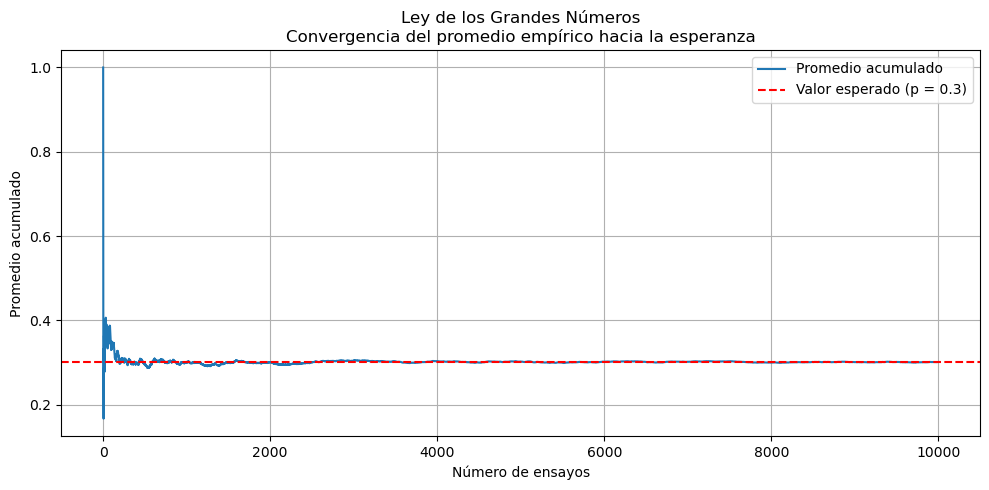

In [15]:
# Parámetros
p = 0.3  # probabilidad de éxito
n = 10000  # número de ensayos

# Simulación de variables Bernoulli (0 o 1)
bernoulli_trials = np.random.binomial(n=1, p=p, size=n)

# Cálculo del promedio acumulado
promedio_acumulado = np.cumsum(bernoulli_trials) / np.arange(1, n + 1)

# Visualización
plt.figure(figsize=(10, 5))
plt.plot(promedio_acumulado, label='Promedio acumulado')
plt.axhline(y=p, color='red', linestyle='--', label='Valor esperado (p = 0.3)')
plt.title('Ley de los Grandes Números\nConvergencia del promedio empírico hacia la esperanza')
plt.xlabel('Número de ensayos')
plt.ylabel('Promedio acumulado')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Teorema Central del Límite (TCL)

El **Teorema Central del Límite (TCL)** es uno de los resultados más poderosos y fundamentales en la teoría de la probabilidad. Establece que, bajo ciertas condiciones, la **distribución muestral del promedio de variables aleatorias independientes e idénticamente distribuidas (i.i.d.)** tiende a una distribución normal, sin importar la forma de la distribución original.

## Enunciado formal

Sean $Y_1, Y_2, \dots, Y_n$ variables aleatorias independientes e idénticamente distribuidas con media $\mu$ y varianza $\sigma^2 < \infty$. Si definimos:

$$
\overline{Y} = \frac{1}{n} \sum_{i=1}^{n} Y_i
$$

y estandarizamos:

$$
Z = \frac{\overline{Y} - \mu}{\sigma / \sqrt{n}},
$$

entonces:

$$
\lim_{n \to \infty} P(Z \leq z) = \Phi(z),
$$

donde $\Phi(z)$ es la función de distribución acumulada de la normal estándar $N(0,1)$&#8203;:contentReference[oaicite:1]{index=1}.

## Implicaciones

- La media muestral $\overline{Y}$ se aproxima a una distribución normal conforme $n$ crece.
- Si $n \geq 30$, esta aproximación suele ser suficientemente buena, incluso si la población no es normal.

## Aplicaciones

- Justificación del uso de modelos normales en inferencia estadística.
- Aproximación de distribuciones complicadas para realizar pruebas de hipótesis o construir intervalos de confianza.
- Base teórica de los métodos de remuestreo y simulación (como bootstrap y Monte Carlo).

## Simulación del Teorema Central del Límite (TCL)

Se simula el Teorema Central del Límite utilizando una variable aleatoria con distribución **exponencial** de parámetro $\lambda = 1$, cuya distribución original no es simétrica.

Se generan múltiples muestras de tamaño $n = 30$, y se calcula el promedio de cada muestra. Según el TCL, la distribución de estos promedios tenderá a una distribución normal:

$$
\frac{\overline{Y} - \mu}{\sigma / \sqrt{n}} \longrightarrow N(0,1)
$$

donde $\mu = \frac{1}{\lambda}$ y $\sigma^2 = \frac{1}{\lambda^2}$ son la esperanza y varianza de la exponencial original.

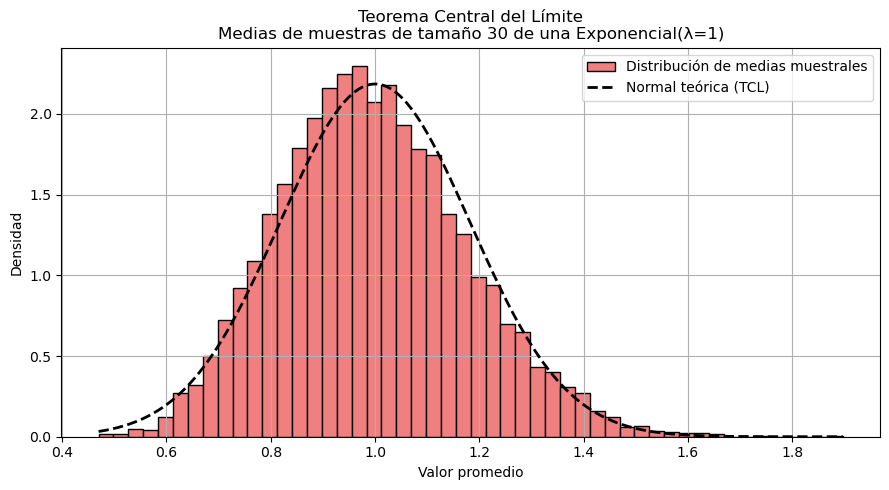

In [16]:
# Parámetros
lambda_exp = 1
mu = 1 / lambda_exp
sigma = 1 / lambda_exp
tam_muestra = 30
replicas = 10000

# Simulación: generar medias de muestras de tamaño tam_muestra
medias = []
for _ in range(replicas):
    muestra = np.random.exponential(scale=1 / lambda_exp, size=tam_muestra)
    medias.append(np.mean(muestra))

medias = np.array(medias)

# Generar la curva normal para comparación
x_vals = np.linspace(min(medias), max(medias), 500)
pdf_normal = norm(loc=mu, scale=sigma / np.sqrt(tam_muestra)).pdf(x_vals)

# Visualización
plt.figure(figsize=(9, 5))
plt.hist(medias, bins=50, density=True, color='lightcoral', edgecolor='black', label='Distribución de medias muestrales')
plt.plot(x_vals, pdf_normal, 'k--', lw=2, label='Normal teórica (TCL)')
plt.title(f'Teorema Central del Límite\nMedias de muestras de tamaño {tam_muestra} de una Exponencial(λ={lambda_exp})')
plt.xlabel('Valor promedio')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()